<a href="https://colab.research.google.com/github/nishigandha2/Topic-Modeling-on-News-Articles/blob/main/Copy_of_News_Topic_Modeling_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/bbc/bbc.csv')

### First Look of Data

In [4]:
data.head()

,Unnamed: 0,news,type
0,0,Yukos unit buyer faces loan claim\n \n The own...,business
1,1,Ad sales boost Time Warner profit\n \n Quarter...,business
2,2,Dollar gains on Greenspan speech\n \n The doll...,business
3,3,US trade gap hits record in 2004\n \n The gap ...,business
4,4,High fuel prices hit BA's profits\n \n British...,business


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2225 non-null   int64 
 1   news        2225 non-null   object
 2   type        2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [6]:
data.shape

(2225, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


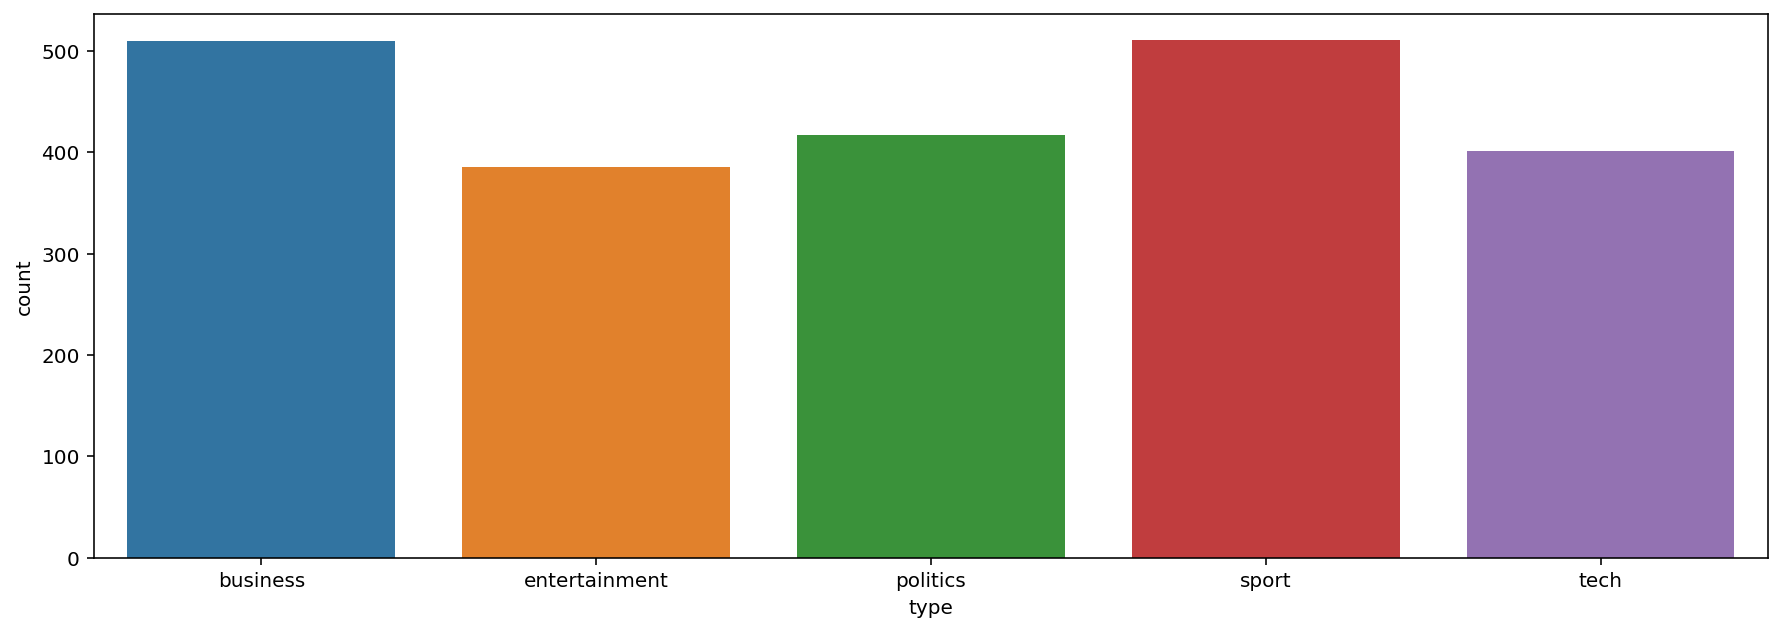

In [7]:
plt.figure(figsize=(15, 5))
sns.countplot(data.type)

### Checking Null Values 

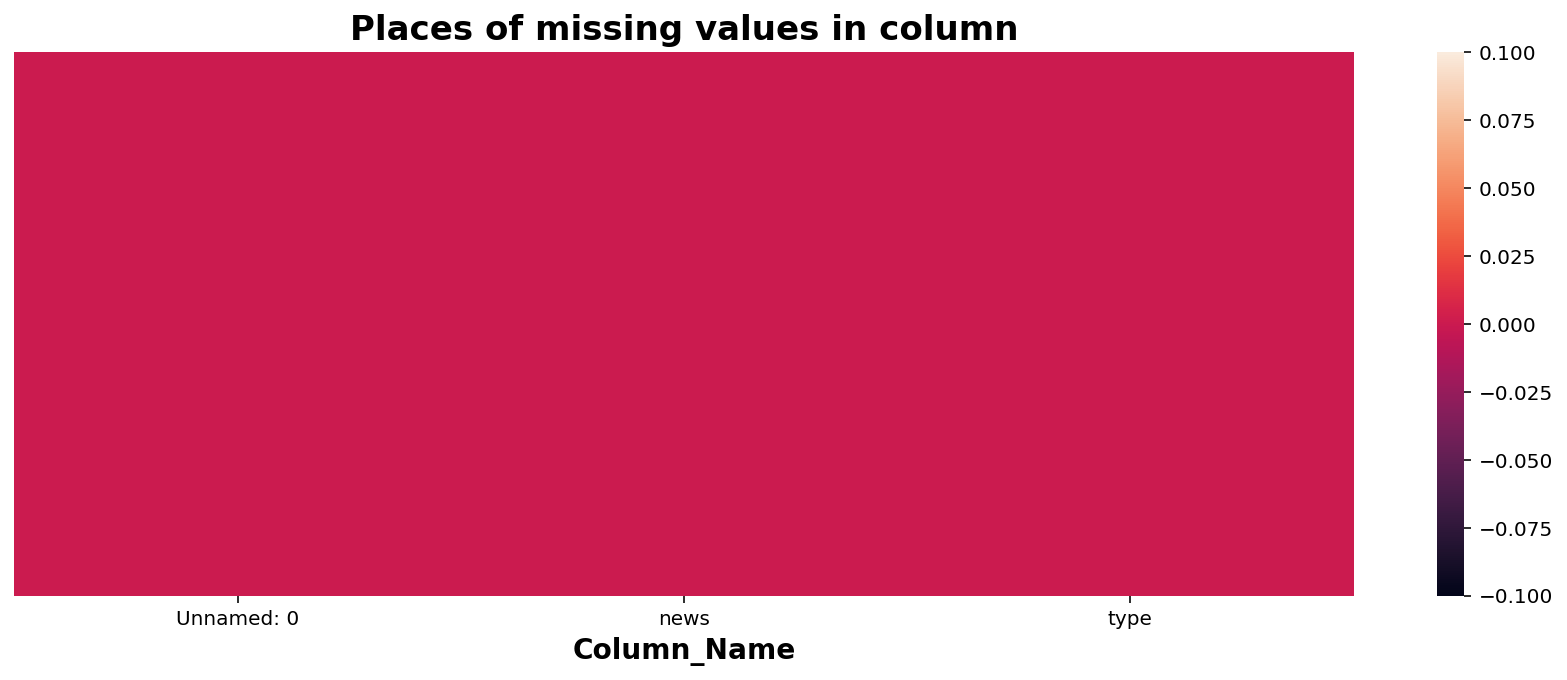

In [8]:
# No missin Values in our dataset
plt.figure(figsize=(15, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

In [9]:
data['News_length'] = data['news'].str.len()
print(data['News_length'])

0       1557
1       2569
2       2258
3       1960
4       2411
        ... 
2220    2526
2221    2857
2222    2334
2223    3594
2224    1889
Name: News_length, Length: 2225, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


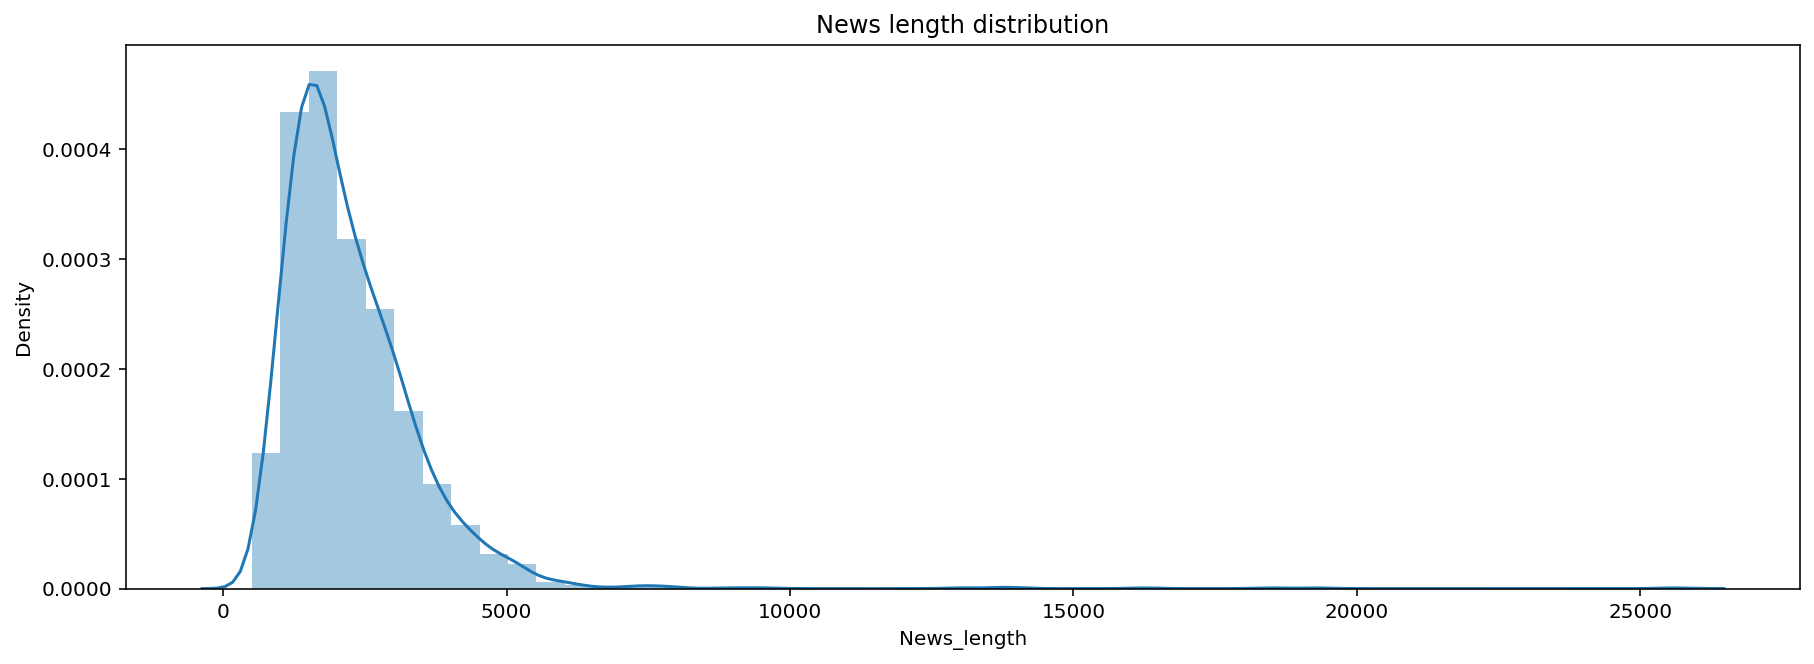

In [10]:
plt.figure(figsize=(15, 5))
sns.distplot(data['News_length']).set_title('News length distribution');